In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from utils import get_data_loaders
import torch
import numpy as np
import matplotlib.pyplot as plt

## create CNN model

In [2]:
model = Sequential ()
model.add(Conv2D (64, (3,3), input_shape = (32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))     
model.add(Activation( 'relu'))   
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

## create data loader

In [3]:

full_dataloaders, _ = get_data_loaders(
     filenames={
            'train': './data/12000_train_mnistmnistmsvhnsynusps.npz',
            'test': './data/12000_test_mnistmnistmsvhnsynusps.npz',
      },
       batch_size= 6000
    )

datafiles to read:  {'train': './data/12000_train_mnistmnistmsvhnsynusps.npz', 'test': './data/12000_test_mnistmnistmsvhnsynusps.npz'}
reading ./data/12000_train_mnistmnistmsvhnsynusps.npz, number of samples: 60000
reading ./data/12000_test_mnistmnistmsvhnsynusps.npz, number of samples: 21600
reading ./data/12000_test_mnistmnistmsvhnsynusps.npz, number of samples: 21600


## loade data and train CNN model 

In [5]:

(images, features, domain_labels, digit_labels) =next(iter(full_dataloaders['train']))

print('images shape: ', images.shape)
print('features shape: ', features.shape)
print('domain labels freq: ', torch.unique(domain_labels, return_counts=True))
print('digit labels freq: ', torch.unique(digit_labels, return_counts=True))

#changing indexes (3,32,32) to (32,32,3)
img = torch.einsum('zkij->zijk',images)
model.fit(img.numpy(),digit_labels.numpy(),epochs=10, batch_size=32, validation_split=0.1)
       

images shape:  torch.Size([6000, 3, 32, 32])
features shape:  torch.Size([6000, 256])
domain labels freq:  (tensor([0, 1, 2, 3, 4]), tensor([1181, 1247, 1186, 1210, 1176]))
digit labels freq:  (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([652, 792, 647, 625, 567, 513, 516, 574, 534, 580]))
Epoch 1/10
169/169 [==============================] - 4s 20ms/step - loss: 1.2880 - accuracy: 0.5672 - val_loss: 0.7279 - val_accuracy: 0.7767
Epoch 2/10
169/169 [==============================] - 3s 19ms/step - loss: 0.6437 - accuracy: 0.8067 - val_loss: 0.6152 - val_accuracy: 0.7900
Epoch 3/10
169/169 [==============================] - 3s 19ms/step - loss: 0.4893 - accuracy: 0.8498 - val_loss: 0.5576 - val_accuracy: 0.8317
Epoch 4/10
169/169 [==============================] - 3s 19ms/step - loss: 0.3873 - accuracy: 0.8794 - val_loss: 0.4942 - val_accuracy: 0.8517
Epoch 5/10
169/169 [==============================] - 3s 19ms/step - loss: 0.2826 - accuracy: 0.9163 - val_loss: 0.4923 - val_accuracy

# every thing after that is temp 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


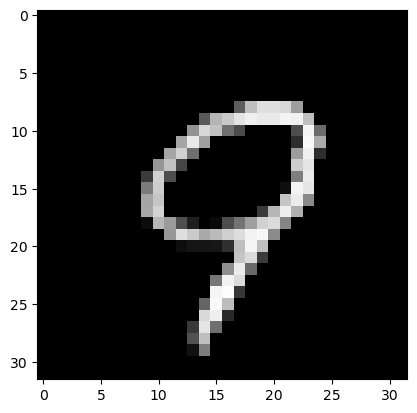

1/1 [==============================] - 0s 14ms/step


In [47]:
test =img.numpy()
plt.imshow(test[19])
plt.show()
model.predict(test[:1])
p = model.layers


In [88]:
print(layer_outputs[9])
print("-------------")


TypeError: list indices must be integers or slices, not tuple